In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Setup : Import the cleaned Dataset

In [3]:
car_data = pd.read_csv("cleaned_cardata.csv")
car_data

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,engineSize
0,0,Fiesta,2017,12000,Automatic,15944,Petrol,1.0
1,1,Focus,2018,14000,Manual,9083,Petrol,1.0
2,2,Focus,2017,13000,Manual,12456,Petrol,1.0
3,3,Fiesta,2019,17500,Manual,10460,Petrol,1.5
4,4,Fiesta,2019,16500,Automatic,1482,Petrol,1.0
...,...,...,...,...,...,...,...,...
17961,17961,B-MAX,2017,8999,Manual,16700,Petrol,1.4
17962,17962,B-MAX,2014,7499,Manual,40700,Petrol,1.0
17963,17963,Focus,2015,9999,Manual,7010,Diesel,1.6
17964,17964,KA,2018,8299,Manual,5007,Petrol,1.2


In [4]:
car_data['year'] = car_data['year'].astype('object')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17966 non-null  int64  
 1   model         17966 non-null  object 
 2   year          17966 non-null  object 
 3   price         17966 non-null  int64  
 4   transmission  17966 non-null  object 
 5   mileage       17966 non-null  int64  
 6   fuelType      17966 non-null  object 
 7   engineSize    17966 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


# Exploratory Data Analysis

<Axes: >

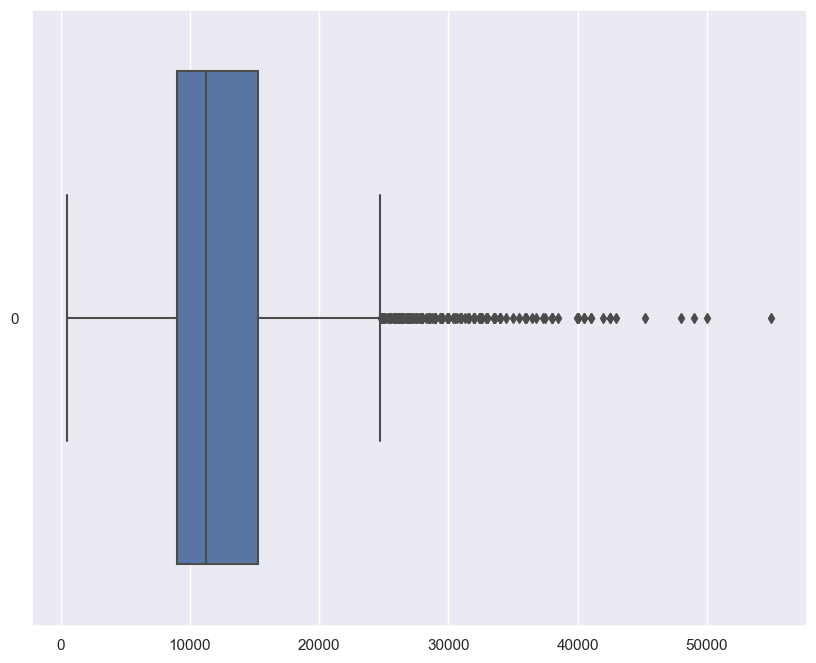

In [5]:
f = plt.figure(figsize = (10,8))
sb.boxplot(car_data['price'], orient = 'h')

In [6]:
car_data[['price']].describe()

,price
count,17966.000000
mean,12279.534844
std,4741.343657
min,495.000000
25%,8999.000000
50%,11291.000000
75%,15299.000000
max,54995.000000


# Part 1 Analysis of Numeric Variables ( Mileage and EngineSize)

In [7]:
car_numeric_data = pd.DataFrame(car_data[["mileage", "engineSize"]])

In [31]:
# Numeric Predictors
car_data[['mileage','engineSize']].describe()

,mileage,engineSize
count,17966.000000,17966.000000
mean,23362.608761,1.350807
std,19472.054349,0.432367
min,1.000000,0.000000
25%,9987.000000,1.000000
50%,18242.500000,1.200000
75%,31060.000000,1.500000
max,177644.000000,5.000000


## Analysis of individual data

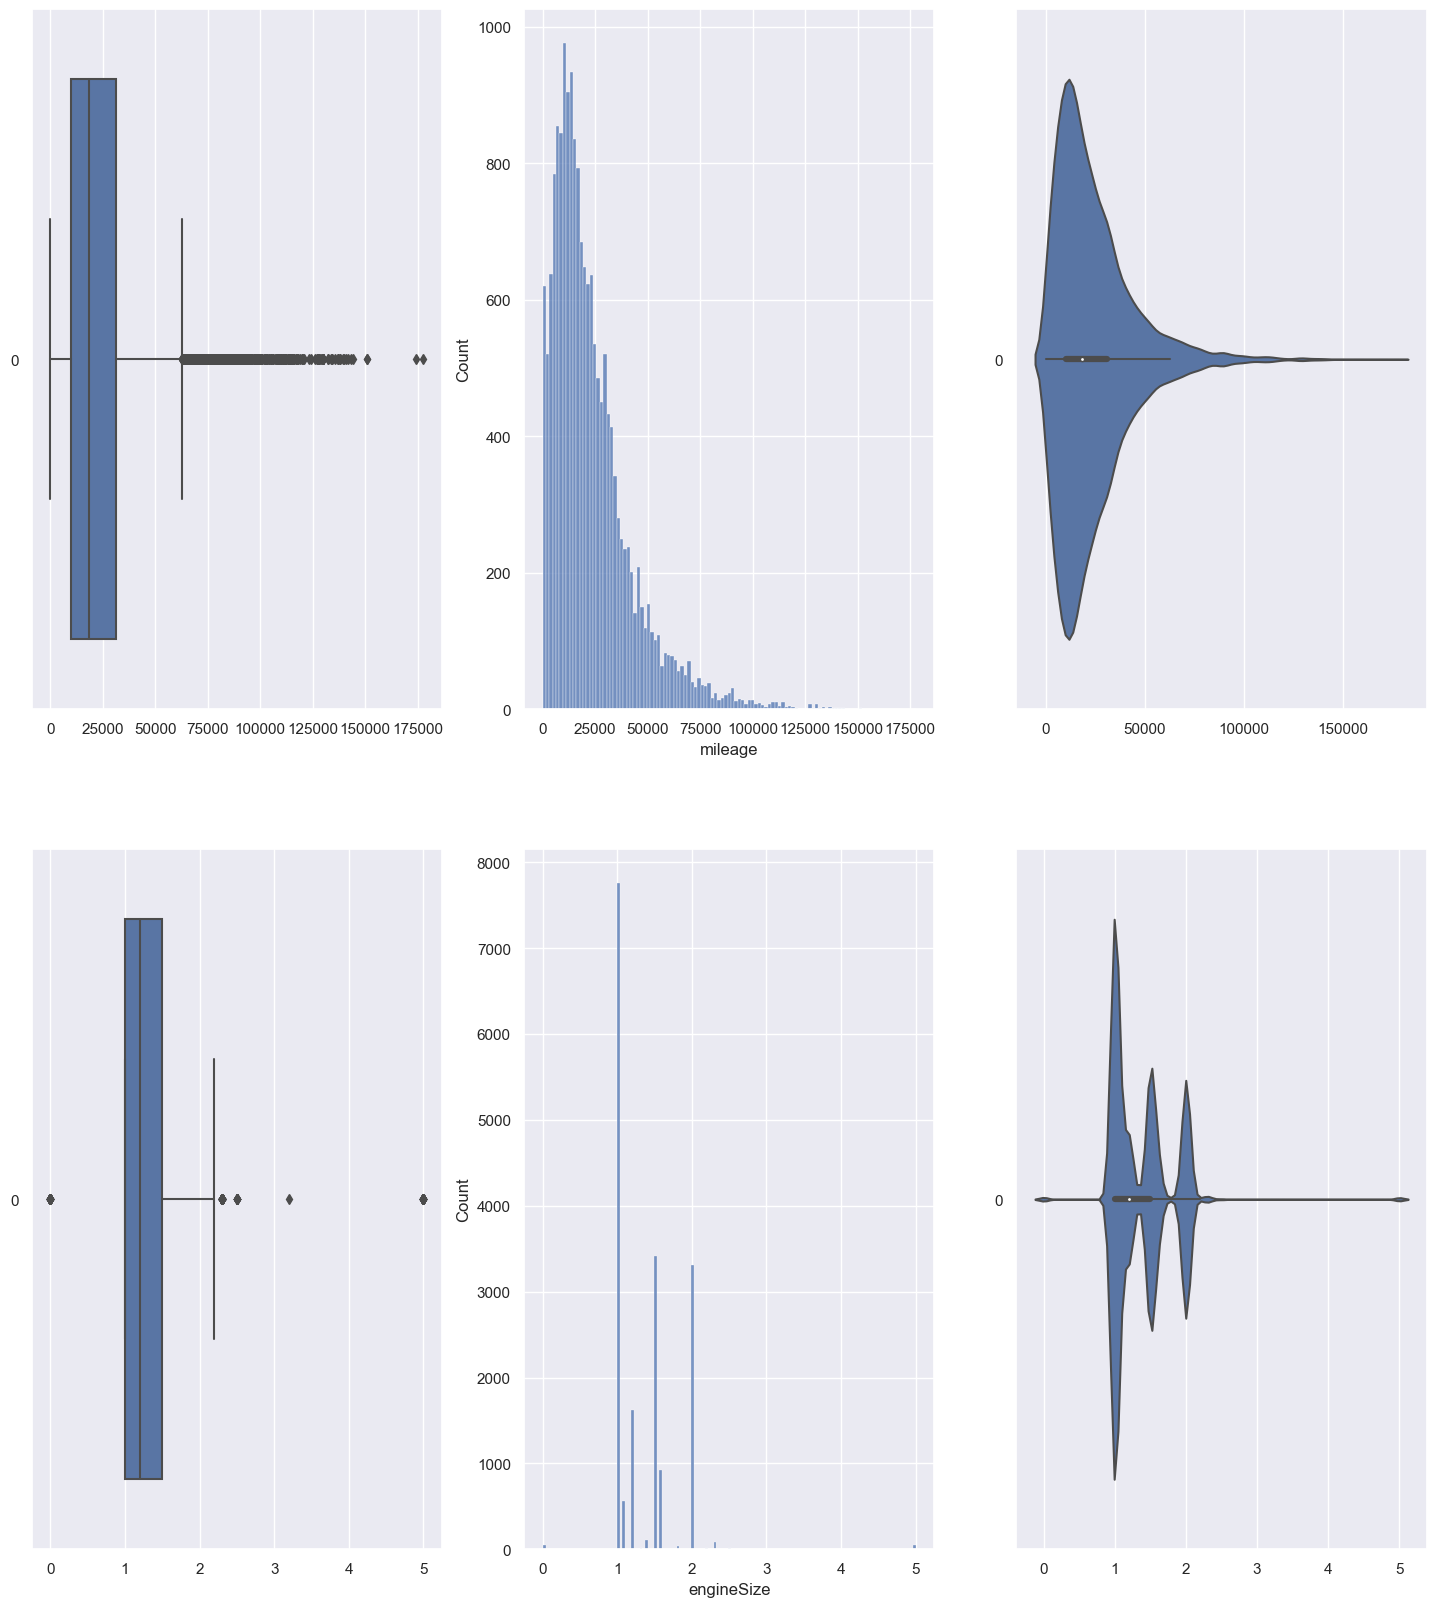

In [10]:
# Distributions of all numeric variables
f, axes = plt.subplots(2, 3, figsize=(18, 20))

count = 0
for var in car_numeric_data:
    sb.boxplot(data = car_numeric_data[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = car_numeric_data[var], ax = axes[count, 1])
    sb.violinplot(data = car_numeric_data[var], orient = "h", ax = axes[count, 2])
    count += 1

In [13]:
# Count the number of outliers in each variable

Q1 = car_numeric_data.quantile(0.25)
Q3 = car_numeric_data.quantile(0.75)

outliers = ((car_numeric_data < (Q1 - 1.5 * (Q3 - Q1))) | (car_numeric_data > (Q3 + 1.5 * (Q3 - Q1))))

outliers.sum()

mileage       878
engineSize    190
dtype: int64

In [14]:
car_numeric_data.skew()

mileage       1.842068
engineSize    1.893121
dtype: float64

## Heatmap of correlation matrix of all numeric variables

             mileage  engineSize     price
mileage     1.000000    0.215035 -0.530659
engineSize  0.215035    1.000000  0.411178
price      -0.530659    0.411178  1.000000


<Axes: >

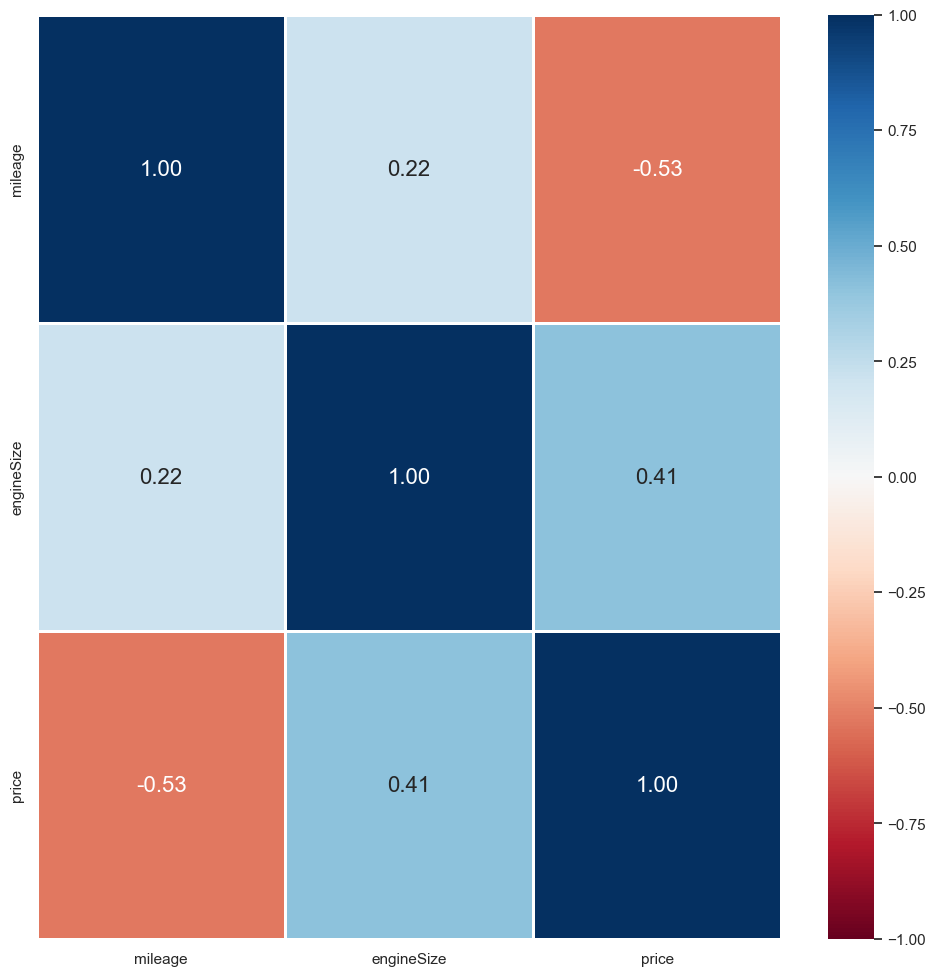

In [23]:
# Multi-variate relationship with price
car_numeric_data = pd.DataFrame(car_data[["mileage", "engineSize", "price"]])

# Correlation Matrix 
print(car_numeric_data.corr())

# Heatmap of the correlation matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(car_numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
          annot = True, fmt = ".2f", annot_kws = {"size": 16}, cmap = "RdBu")

## Analysis of variables against one another

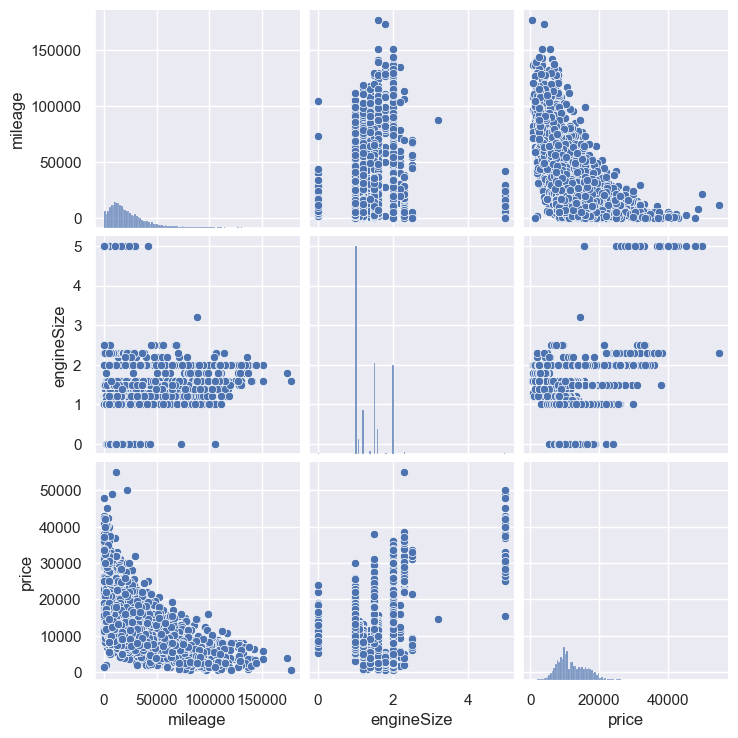

In [24]:
sb.pairplot(data = car_numeric_data)

In [33]:
## INPUT VISUALIZATION HERE

In [37]:
## INPUT OBSERVATION HERE

# Part 2: Analysis of Categorical data

In [25]:
# Categorical Predictors
car_data[['model','year','transmission','fuelType']].describe()

,model,year,transmission,fuelType
count,17966,17966,17966,17966
unique,24,23,3,5
top,Fiesta,2017,Manual,Petrol
freq,6557,4888,15518,12179


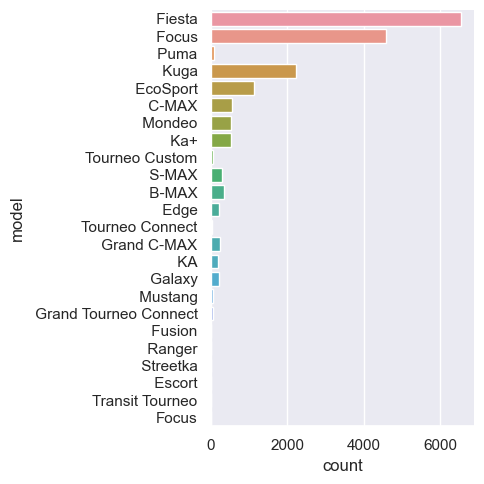

In [38]:
# model of the car
sb.catplot(y = 'model', data = car_data, kind = "count")

In [39]:
## INPUT OBSERVATION HERE

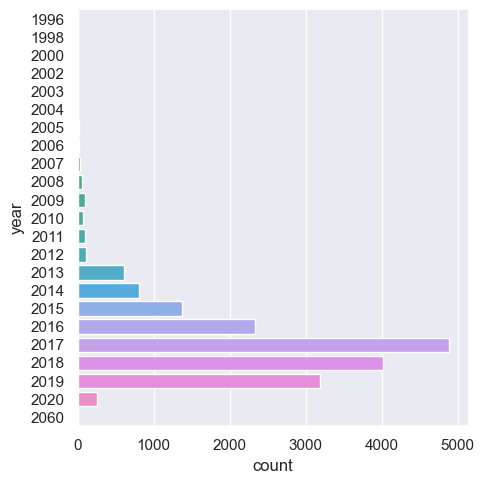

In [40]:
# year production of the car
sb.catplot(y = 'year', data = car_data, kind = "count")

In [41]:
## INPUT OBSERVATION HERE

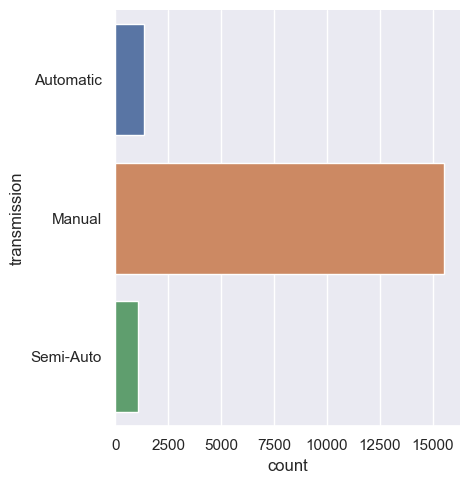

In [42]:
# transmission of the car
sb.catplot(y = 'transmission', data = car_data, kind = "count")

In [43]:
## INPUT OBSERVATION HERE

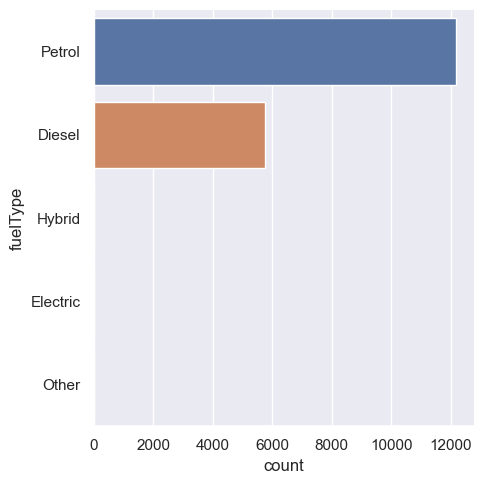

In [44]:
# fueltype of the car
sb.catplot(y = 'fuelType', data = car_data, kind = "count")

In [45]:
## INPUT OBSERVATION HERE

# Part 3: Relationship with price for numeric data

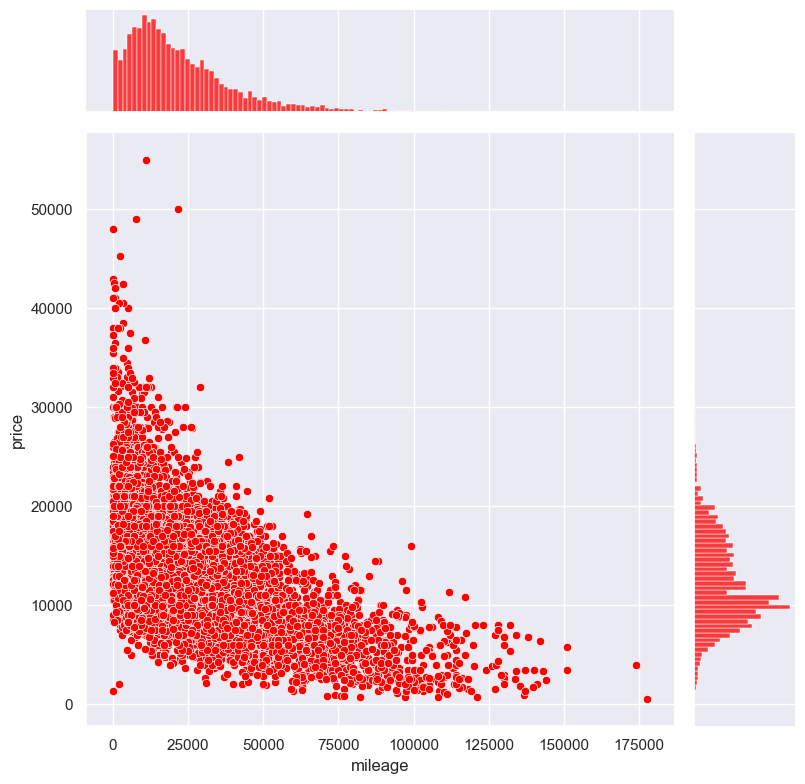

In [49]:
# Mileage vs Price
sb.jointplot(x = car_data["mileage"], y = car_data["price"], height = 8, color = "red")

In [59]:
## OBSERVATIONS

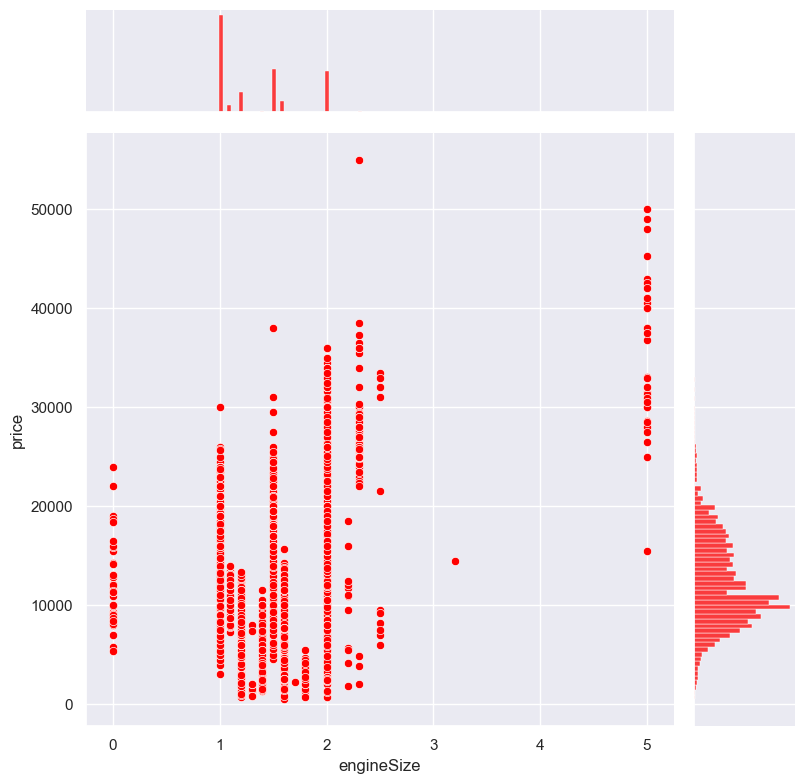

In [50]:
# EngineSize vs price
sb.jointplot(x = car_data["engineSize"], y = car_data["price"], height = 8, color = "red")

In [60]:
## OBSERVATIONS

## Relationship with price for categorical data

<Axes: xlabel='price', ylabel='model'>

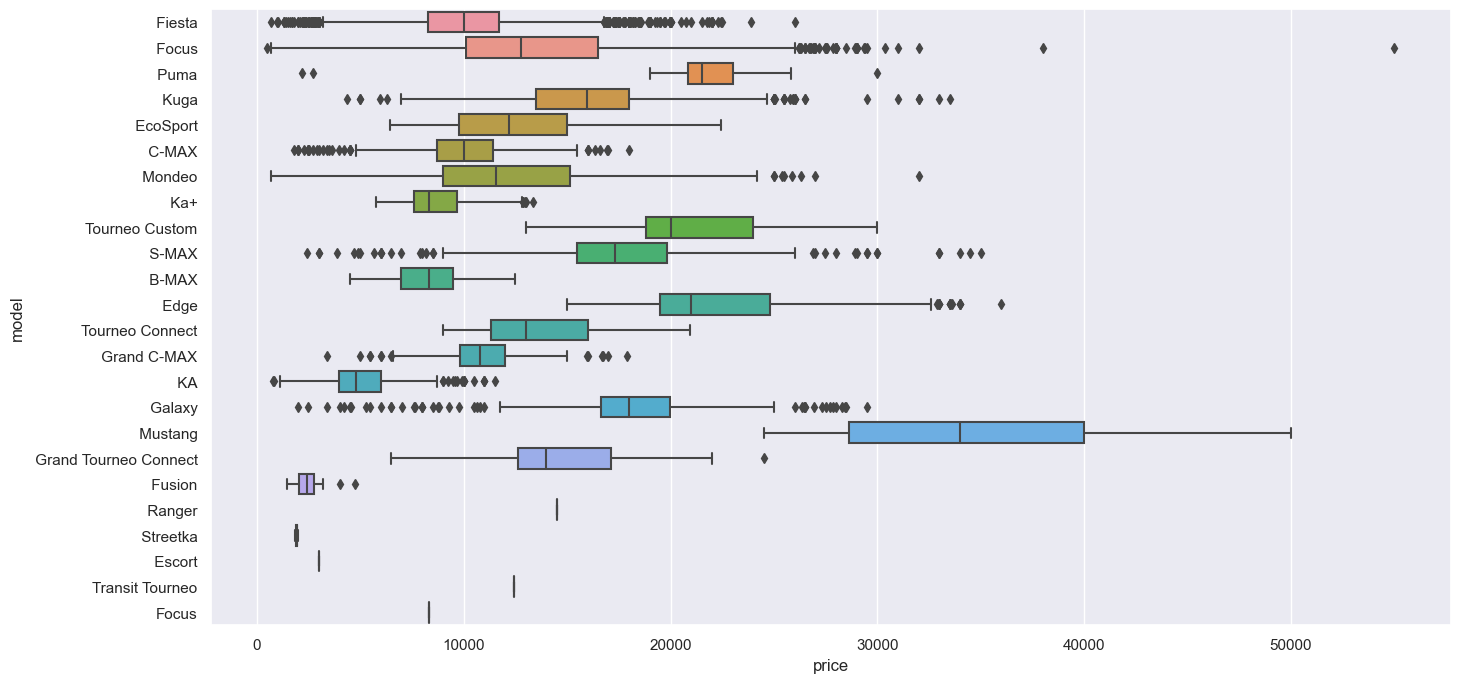

In [53]:
f = plt.figure(figsize = (16, 8))
sb.boxplot(x = car_data["price"], y = car_data["model"])

In [61]:
## OBSERVATIONS

<Axes: xlabel='year', ylabel='price'>

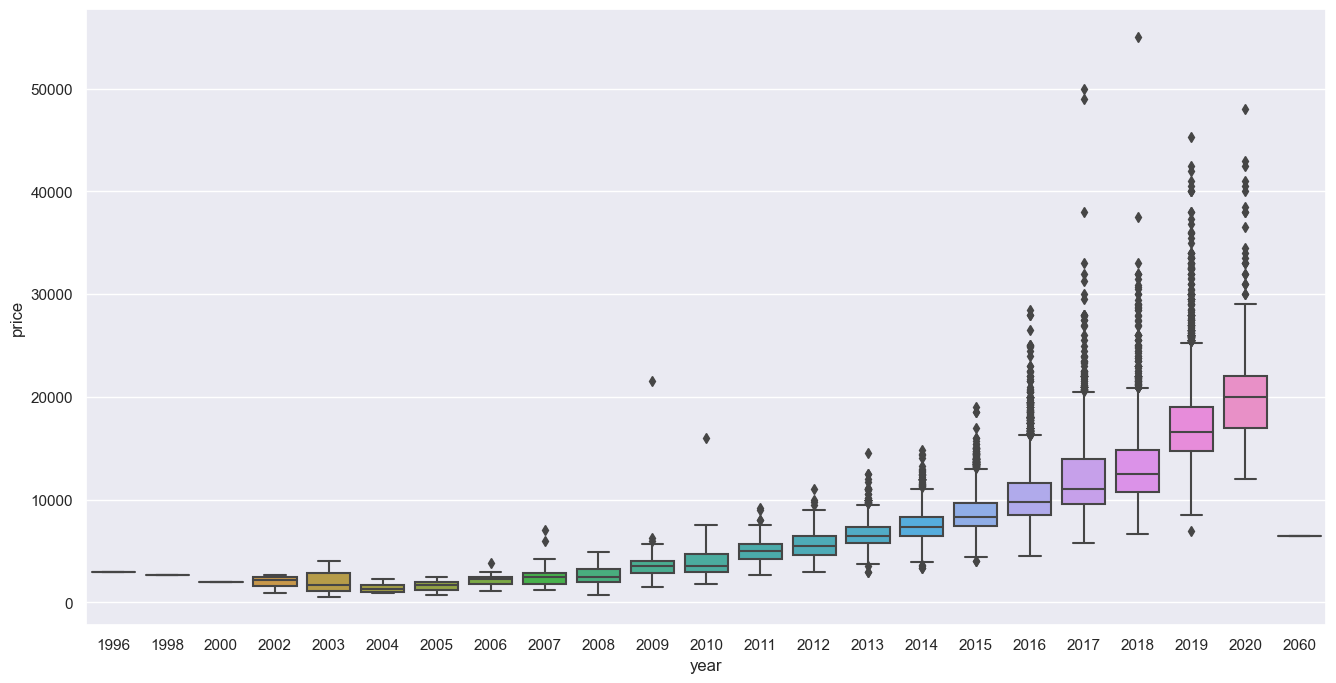

In [51]:
f = plt.figure(figsize = (16, 8))
sb.boxplot(x = car_data["year"], y = car_data["price"])

In [66]:
## OBSERVATIONS

<Axes: xlabel='price', ylabel='transmission'>

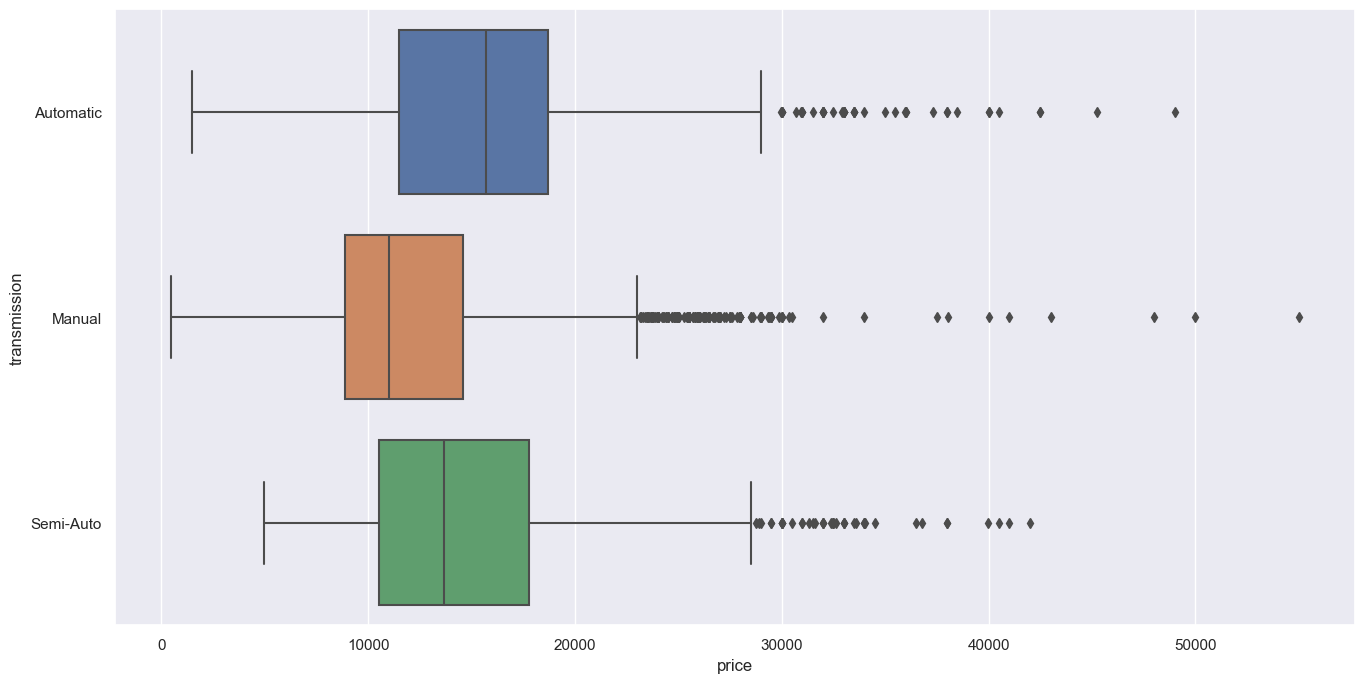

In [57]:
f = plt.figure(figsize = (16, 8))
sb.boxplot(x = car_data["price"], y = car_data["transmission"])

In [67]:
## OBSERVATIONS

<Axes: xlabel='price', ylabel='fuelType'>

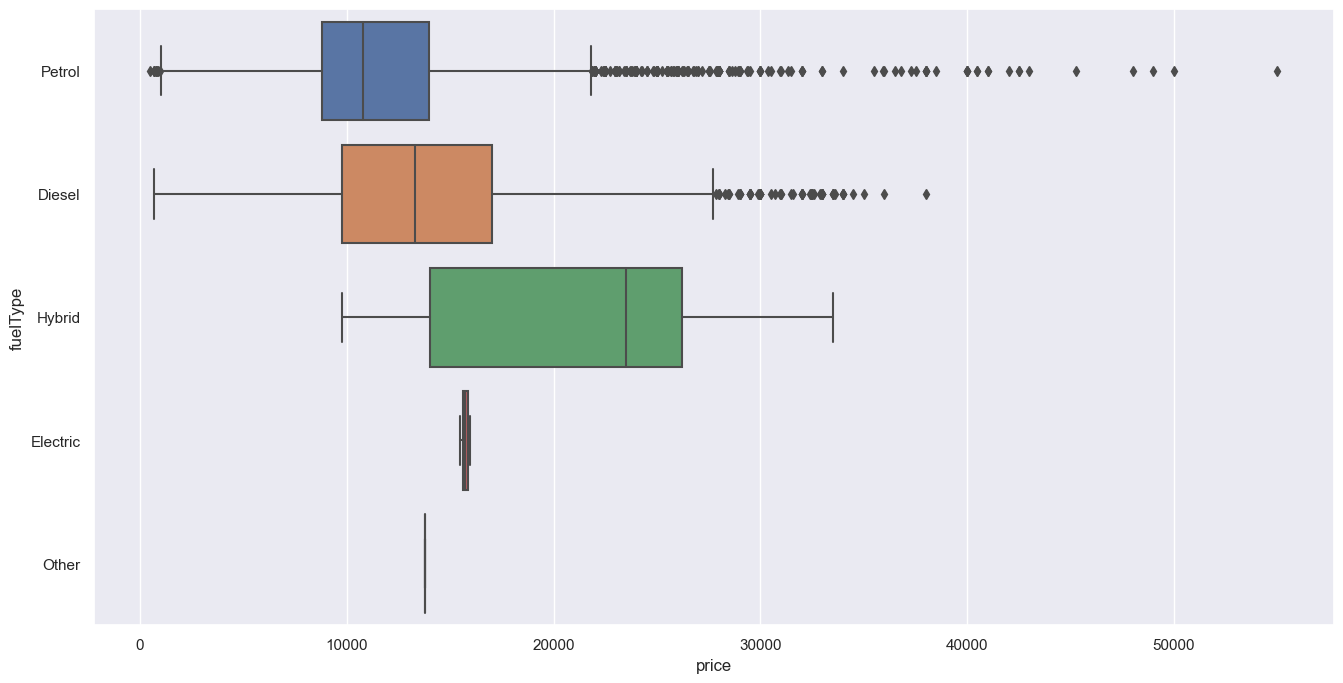

In [58]:
f = plt.figure(figsize = (16, 8))
sb.boxplot(x = car_data["price"], y = car_data["fuelType"])

In [68]:
## OBSERVATIONS